In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas_profiling

In [3]:
data=pd.read_excel('C:\\Users\\hp\\Desktop\\analytixlabs\\Ml case study\\credit card\\Data set.xlsx')

In [4]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [5]:
#pandas_profiling.ProfileReport(data,minimal=True)

In [6]:
#removing the variable which has high cardinality and high missing percentages.
data.drop(columns=['custid','lntollmon','lntollten','lnequipmon','lncardmon','lncardten','lnwiremon','lnwireten' ],inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 122 entries, region to response_03
dtypes: float64(24), int64(97), object(1)
memory usage: 4.7+ MB


In [8]:
data['total_spent']=data.cardspent+data.card2spent

In [9]:
data.drop(columns=['card2spent','cardspent'],inplace=True)

In [10]:
conti_var=data.loc[:,(data.dtypes=='int64')|(data.dtypes=='float64')]

In [11]:
cat_var=data.loc[:,data.dtypes=='object']

In [12]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [13]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [14]:
conti_var.apply(lambda x: continuous_var_summary(x))

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spent
N,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
NMISS,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
SUM,15007.000000,13431.000000,2518.000000,235128.000000,21194.000000,72715.000000,13360.000000,13764.000000,756.000000,48652.000000,...,1005.000000,3164.000000,2396.000000,2374.000000,894.000000,2363.000000,418.000000,649.000000,513.000000,2.490393e+06
MEAN,3.001400,2.687275,0.503600,47.025600,4.238800,14.543000,2.672000,2.752800,0.151200,9.730400,...,0.201000,0.632800,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600,4.980786e+02
MEDIAN,3.000000,3.000000,1.000000,47.000000,4.000000,14.000000,2.000000,2.000000,0.000000,7.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.142500e+02
STD,1.421760,1.425925,0.500037,17.770338,1.308785,3.281083,1.211738,1.737900,0.358280,9.690929,...,0.400788,0.482090,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466,3.515293e+02
VAR,2.021402,2.033262,0.250037,315.784902,1.712917,10.765504,1.468310,3.020296,0.128364,93.914099,...,0.160631,0.232411,0.249617,0.249415,0.146860,0.249299,0.076626,0.112975,0.092092,1.235728e+05
MIN,1.000000,1.000000,0.000000,18.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.110000e+00
P1,1.000000,1.000000,0.000000,18.000000,2.000000,8.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.819760e+01
P5,1.000000,1.000000,0.000000,20.000000,2.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.331060e+02


In [15]:
cat_var.apply(lambda x :categorical_var_summary(x) )

,birthmonth
N,5000
NMISS,0
MODE,September
FREQ,458
PERCENT,9.16


In [16]:
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [17]:
conti_var=conti_var.apply(lambda x:missing_imputation(x, stats = 'mean'))

In [18]:
conti_var=conti_var.apply(lambda x:x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

In [19]:
conti_var.apply(lambda x: continuous_var_summary(x))

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spent
N,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
SUM,15007.000000,13436.374550,2518.000000,235128.000000,21194.000000,72721.000000,13360.000000,13764.000000,756.000000,48490.000000,...,1005.000000,3164.000000,2396.000000,2374.000000,894.000000,2363.000000,418.000000,649.000000,513.000000,2.467176e+06
MEAN,3.001400,2.687275,0.503600,47.025600,4.238800,14.544200,2.672000,2.752800,0.151200,9.698000,...,0.201000,0.632800,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600,4.934353e+02
MEDIAN,3.000000,3.000000,1.000000,47.000000,4.000000,14.000000,2.000000,2.000000,0.000000,7.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.142500e+02
STD,1.421760,1.425640,0.500037,17.770338,1.308785,3.242553,1.211738,1.737900,0.358280,9.581689,...,0.400788,0.482090,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466,3.227953e+02
VAR,2.021402,2.032449,0.250037,315.784902,1.712917,10.514149,1.468310,3.020296,0.128364,91.808758,...,0.160631,0.232411,0.249617,0.249415,0.146860,0.249299,0.076626,0.112975,0.092092,1.041968e+05
MIN,1.000000,1.000000,0.000000,18.000000,2.000000,8.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.819760e+01
P1,1.000000,1.000000,0.000000,18.000000,2.000000,8.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.819998e+01
P5,1.000000,1.000000,0.000000,20.000000,2.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.331060e+02


In [20]:
c=conti_var.corr()

In [21]:
c.to_excel('corr1.xlsx')

In [22]:
#export the corr. to excel to check the correlation of x variables with y variable.

In [23]:
#removing the variables which are insignificant and weekly correlated with y variable after checking in excel.
conti_var.drop(columns=[ 'agecat',
 'edcat',
 'jobcat',
 'employ',
 'lninc',
 'lncreddebt',
 'lnothdebt',
 'jobsat',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'addresscat',
 'carown',
 'carvalue',
 'commutetime',
 'commutewalk',
 'commutenonmotor',
 'vote',
 'cardtenurecat',
 'card2tenurecat',
 'lnlongmon',
 'lnlongten',
 'tollmon',
 'lnequipten',
 'voice',
 'pager',
 'callid' ,
 'callwait',
 'forward',
 'confer'],inplace=True)

In [24]:
conti_var.drop(columns='commute',inplace=True)

In [25]:
conti_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             5000 non-null   int64  
 1   townsize           5000 non-null   float64
 2   gender             5000 non-null   int64  
 3   age                5000 non-null   int64  
 4   ed                 5000 non-null   int64  
 5   union              5000 non-null   int64  
 6   empcat             5000 non-null   int64  
 7   retire             5000 non-null   int64  
 8   income             5000 non-null   float64
 9   inccat             5000 non-null   int64  
 10  debtinc            5000 non-null   float64
 11  creddebt           5000 non-null   float64
 12  othdebt            5000 non-null   float64
 13  default            5000 non-null   int64  
 14  marital            5000 non-null   int64  
 15  spoused            5000 non-null   int64  
 16  spousedcat         5000 

In [26]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [27]:
cat_var2=conti_var[['region','cartype','carcatvalue','commutecat','reason','polview','card','card2','cardtype','card2type','bfast','internet']]

In [28]:
cat_var2.columns

Index(['region', 'cartype', 'carcatvalue', 'commutecat', 'reason', 'polview',
       'card', 'card2', 'cardtype', 'card2type', 'bfast', 'internet'],
      dtype='object')

In [29]:
conti_var.drop(columns=['region','cartype','carcatvalue','commutecat','reason','polview','card','card2','cardtype','card2type','bfast','internet'],inplace=True)

In [30]:
for c_feature in ['region','cartype','carcatvalue','commutecat','reason','polview','card','card2','cardtype','card2type','bfast','internet']:
    cat_var2[c_feature] = cat_var2[c_feature].astype('category')
    cat_var2 = create_dummies(cat_var2, c_feature)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
cat_var2

,region_2,region_3,region_4,region_5,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,commutecat_2,...,cardtype_4,card2type_2,card2type_3,card2type_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4996,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4997,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4998,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [32]:
datafinal=pd.concat([conti_var,cat_var2],axis=1)

In [33]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 116 entries, townsize to internet_4
dtypes: float64(15), int64(58), uint8(43)
memory usage: 3.0 MB


In [34]:
datafinal.columns

Index(['townsize', 'gender', 'age', 'ed', 'union', 'empcat', 'retire',
       'income', 'inccat', 'debtinc',
       ...
       'cardtype_4', 'card2type_2', 'card2type_3', 'card2type_4', 'bfast_2',
       'bfast_3', 'internet_1', 'internet_2', 'internet_3', 'internet_4'],
      dtype='object', length=116)

In [35]:
from sklearn.feature_selection import f_regression

In [36]:
a=datafinal.columns.difference(['total_spent'])

In [37]:
pd.DataFrame(a).to_excel('Feature.xlsx')

In [38]:
feature=datafinal.loc[:,['active',
'address',
'age',
'bfast_2',
'bfast_3',
'callcard',
'carbought',
'carbuy',
'carcatvalue_1',
'carcatvalue_2',
'carcatvalue_3',
'card2_2',
'card2_3',
'card2_4',
'card2_5',
'card2benefit',
'card2fee',
'card2tenure',
'card2type_2',
'card2type_3',
'card2type_4',
'card_2',
'card_3',
'card_4',
'card_5',
'cardbenefit',
'cardfee',
'cardmon',
'cardten',
'cardtenure',
'cardtype_2',
'cardtype_3',
'cardtype_4',
'cars',
'cartype_0',
'cartype_1',
'churn',
'commutebike',
'commutebus',
'commutecar',
'commutecarpool',
'commutecat_2',
'commutecat_3',
'commutecat_4',
'commutecat_5',
'commutemotorcycle',
'commutepublic',
'commuterail',
'creddebt',
'debtinc',
'default',
'ebill',
'ed',
'empcat',
'equip',
'equipmon',
'equipten',
'gender',
'homeown',
'hometype',
'hourstv',
'inccat',
'income',
'internet_1',
'internet_2',
'internet_3',
'internet_4',
'longmon',
'longten',
'marital',
'multline',
'news',
'othdebt',
'owncd',
'owndvd',
'ownfax',
'owngame',
'ownipod',
'ownpc',
'ownpda',
'owntv',
'ownvcr',
'pets',
'polcontrib',
'polparty',
'polview_2',
'polview_3',
'polview_4',
'polview_5',
'polview_6',
'polview_7',
'reason_2',
'reason_3',
'reason_4',
'reason_9',
'region_2',
'region_3',
'region_4',
'region_5',
'reside',
'response_01',
'response_02',
'response_03',
'retire',
'spoused',
'spousedcat',
'telecommute',
'tenure',
'tollfree',
'tollten',
'townsize',
'union',
'wireless',
'wiremon',
'wireten'
]]

In [39]:
target=datafinal.total_spent

In [40]:
F_val,P_val=f_regression(feature,target)

In [41]:
F_Reg=pd.concat([pd.Series(feature.columns),pd.Series(F_val),pd.Series(P_val)],axis=1)

In [42]:
F_Reg.to_excel('F_Reg.xlsx')

In [43]:
datafinal.drop(columns=['active',
'bfast_2',
'carbought',
'card2benefit',
'card2type_2',
'card2type_3',
'card2type_4',
'cardtype_2',
'cardtype_3',
'cardtype_4',
'cartype_0',
'cartype_1',
'churn',
'commutecarpool',
'commutecat_2',
'commutecat_3',
'commutecat_4',
'commutecat_5',
'commutepublic',
'commuterail',
'internet_1',
'internet_2',
'marital',
'pets',
'polparty',
'polview_2',
'polview_3',
'polview_5',
'polview_7',
'reason_9',
'region_2',
'region_3',
'region_4',
'reside',
'response_01',
'telecommute',
'union'
],inplace=True)

In [44]:
datafinal.shape

(5000, 79)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [46]:
f=datafinal.columns.difference(['total_spent'])

In [47]:
model_equation='total_spent~'+ '+'.join(f)
y,x=dmatrices(model_equation,datafinal,return_type='dataframe')

In [48]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Vif']=[variance_inflation_factor(x.values,i)  for i in range(x.shape[1])]

In [49]:
vif.to_excel('VIF.xlsx')

In [50]:
datafinal.drop(columns=[
'longten',
'equipmon',
'longmon',
'spousedcat',
'spoused',
'wiremon',
'equip',
'card2tenure',
'cardtenure',
'cardten',
'wireten',
'tenure'
],inplace=True)

In [51]:
datafinal.shape

(5000, 67)

In [52]:
datafinal.drop(columns=['cardmon','wireless','equipten','inccat'],inplace=True)

In [53]:
feature2=datafinal[datafinal.columns.difference(['total_spent'])]

In [54]:
target2=datafinal.total_spent

In [55]:
F_val,P_val=f_regression(feature2,target2)

In [56]:
F_Reg2=pd.concat([pd.Series(feature2.columns),pd.Series(F_val),pd.Series(P_val).round(2)],axis=1)

In [57]:
F_Reg2.to_excel('F_Reg2.xlsx')

In [58]:
datafinal.drop(columns=['carbuy',
'cardbenefit',
'cardfee',
'cars',
'commutebus',
'commutecar',
'commutemotorcycle',
'debtinc',
'default',
'hometype',
'owngame',
'polview_4',
'response_02',
'townsize'
],inplace=True)

In [59]:
f2=datafinal.columns.difference(['total_spent'])

In [60]:
model_equation2='total_spent~'+ '+'.join(f2)

In [61]:
y,x=dmatrices(model_equation2,datafinal,return_type='dataframe')

In [62]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Vif']=[variance_inflation_factor(x.values,i)  for i in range(x.shape[1])]

In [63]:
vif.to_excel('VIF2.xlsx')

In [64]:
datafinal.drop(columns='age',inplace=True)

In [65]:
datafinal['ln_tot_spent']=np.log(datafinal.total_spent)

In [66]:
train, test = train_test_split(datafinal, test_size = 0.3, random_state = 12345)

In [67]:
print('No of obs in training: ', len(train), ' | ', 'No of obs in testing: ', len(test))

No of obs in training:  3500  |  No of obs in testing:  1500


In [68]:
xnames=pd.DataFrame(datafinal.columns.difference(['ln_tot_spent','total_spent']))

In [69]:
xnames.to_excel('xnames.xlsx')

In [70]:
lm=smf.ols('''ln_tot_spent ~ address+
bfast_3+
callcard+
carcatvalue_1+
carcatvalue_2+
carcatvalue_3+
card2_2+
card2_3+
card2_4+
card2_5+
card2fee+
card_2+
card_3+
card_4+
card_5+
commutebike+
creddebt+
ebill+
ed+
empcat+
gender+
homeown+
hourstv+
income+
internet_3+
internet_4+
multline+
news+
othdebt+
owncd+
owndvd+
ownfax+
ownipod+
ownpc+
ownpda+
owntv+
ownvcr+
polcontrib+
polview_6+
reason_2+
reason_3+
reason_4+
region_5+
response_03+
retire+
tollfree+
tollten''',train).fit()


In [71]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_tot_spent   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     38.72
Date:                Wed, 13 May 2020   Prob (F-statistic):          2.47e-277
Time:                        12:00:37   Log-Likelihood:                -2693.2
No. Observations:                3500   AIC:                             5482.
Df Residuals:                    3452   BIC:                             5778.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.4998      0.101     64.615

In [72]:
lm2=smf.ols('''ln_tot_spent ~ 
carcatvalue_1+
card2_2+
card2_3+
card2_4+
card2_5+
card_2+
card_3+
card_4+
card_5+
gender+
hourstv+
income+
reason_2+
reason_4+
retire''',train).fit()


In [73]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_tot_spent   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     117.8
Date:                Wed, 13 May 2020   Prob (F-statistic):          2.72e-296
Time:                        12:00:37   Log-Likelihood:                -2716.4
No. Observations:                3500   AIC:                             5465.
Df Residuals:                    3484   BIC:                             5563.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.6817      0.053    126.370

In [74]:
train['pred_spent'] = np.exp(lm2.predict(train))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
train[['total_spent','pred_spent']]

,total_spent,pred_spent
509,848.91,591.376033
3847,613.91,595.519879
3417,525.95,391.689729
382,331.38,317.808797
1345,848.60,328.666315
...,...,...
3497,216.91,457.331288
3492,709.27,354.615184
2177,167.69,310.844063
3557,797.44,838.474523


In [76]:
test['pred_spent'] = np.exp(lm2.predict(test))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
MAPE_train = '%.3f' % np.mean(np.abs(train.total_spent - train.pred_spent)/train.total_spent)
MAPE_test = '%.3f' % np.mean(np.abs(test.total_spent - test.pred_spent)/test.total_spent)

In [92]:
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.473  |  MAPE of testing data:  0.502


In [95]:
RMSE_train = np.sqrt(mean_squared_error(train.total_spent ,train.pred_spent).round(3))
RMSE_test = np.sqrt(mean_squared_error(test.total_spent ,test.pred_spent).round(3))

In [96]:
print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

RMSE of training data:  269.76569648493114  |  RMSE of testing data:  271.6475621094362


In [102]:
Corr_train = stats.stats.pearsonr(train.total_spent, train.pred_spent)
Corr_test = stats.stats.pearsonr(test.total_spent, test.pred_spent)

In [103]:
print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)

Correlation of training data:  (0.5858533100551927, 1.057e-321)  |  Correlation of testing data:  (0.5379354751882821, 2.894601195573053e-113)


In [104]:
train['Deciles'] = pd.qcut(train['pred_spent'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_spent'], 10, labels = False)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
Predicted_avg = train[['Deciles', 'pred_spent']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_spent']
Actual_avg = train[['Deciles', 'total_spent']].groupby(train.Deciles).mean().sort_index(ascending = False)['total_spent']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

In [106]:
Decile_analysis_train

,Deciles,pred_spent,total_spent
0,9,862.746831,906.653117
1,8,623.387841,722.389675
2,7,534.287792,603.843977
3,6,462.387612,527.781642
4,5,400.942870,468.408407
5,4,359.309671,422.696544
6,3,328.816489,373.052272
7,2,304.839866,346.548251
8,1,282.082379,322.424258
9,0,244.038370,276.946577


In [108]:
Predicted_avg = test[['Deciles', 'pred_spent']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_spent']
Actual_avg = test[['Deciles', 'total_spent']].groupby(test.Deciles).mean().sort_index(ascending = False)['total_spent']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

In [109]:
Decile_analysis_test

,Deciles,pred_spent,total_spent
0,9,839.183932,879.456461
1,8,616.763918,653.685648
2,7,530.155002,558.598749
3,6,455.738240,501.295949
4,5,397.514444,489.713416
5,4,358.593573,434.214600
6,3,328.649015,376.260968
7,2,306.657133,352.792784
8,1,283.529923,333.339819
9,0,242.192369,270.080123


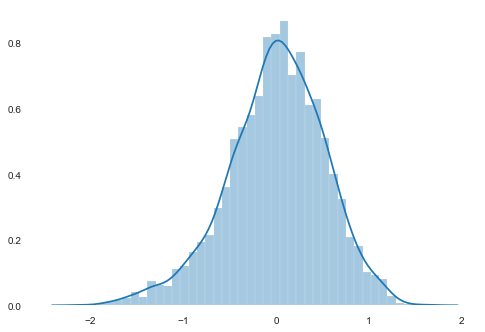

In [111]:
import matplotlib.pyplot as plt
sns.distplot(lm2.resid)
plt.show()